In [22]:
from pandas import read_csv
A = read_csv("C:/Users/Dell/Desktop/Cars93.csv")

In [23]:
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [24]:
A[["Price","MPG.city"]].head()


,Price,MPG.city
0,15.9,25
1,33.9,18
2,29.1,20
3,37.7,19
4,30.0,22


In [25]:
B = A[["Price","MPG.city"]]


In [26]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
model = km.fit(B)


In [27]:
model

KMeans(n_clusters=4)

In [28]:
from warnings import filterwarnings
filterwarnings("ignore")

In [29]:
B['cluster'] = model.labels_


In [30]:
B.head()

,Price,MPG.city,cluster
0,15.9,25,2
1,33.9,18,3
2,29.1,20,3
3,37.7,19,3
4,30.0,22,3


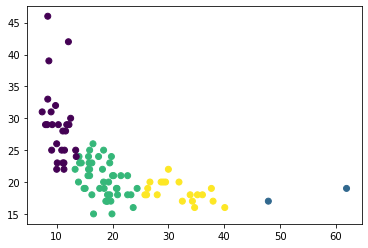

In [31]:
import matplotlib.pyplot as plt
plt.scatter(B['Price'],B['MPG.city'],c=B.cluster)

In [32]:
B["Make"]=A.Make


In [33]:
B

,Price,MPG.city,cluster,Make
0,15.9,25,2,Acura Integra
1,33.9,18,3,Acura Legend
2,29.1,20,3,Audi 90
3,37.7,19,3,Audi 100
4,30.0,22,3,BMW 535i
...,...,...,...,...
88,19.7,17,2,Volkswagen Eurovan
89,20.0,21,2,Volkswagen Passat
90,23.3,18,2,Volkswagen Corrado
91,22.7,21,2,Volvo 240


In [34]:
a = input("Enter any car Make: ")

cluster_no_for_car = B[B.Make == a].cluster.values[0]

print("Cars that are similar to your cars are: ")

print(B[B.cluster == cluster_no_for_car].Make.values)

Enter any car Make: Buick Riviera
Cars that are similar to your cars are: 
['Acura Legend' 'Audi 90' 'Audi 100' 'BMW 535i' 'Buick Riviera'
 'Cadillac DeVille' 'Cadillac Seville' 'Chevrolet Corvette'
 'Chrysler Imperial' 'Dodge Stealth' 'Lexus ES300' 'Lexus SC300'
 'Lincoln Continental' 'Lincoln Town_Car' 'Mazda RX-7'
 'Mercedes-Benz 190E' 'Mitsubishi Diamante' 'Saab 900' 'Volvo 850']


In [36]:
from sklearn.cluster import KMeans
K = list(range(1,15,1))
WCSS = []
for i in range(1,15,1):
    km = KMeans(n_clusters=i)
    B = A[["Price","MPG.city"]]
    model = km.fit(B)
    WCSS.append(model.inertia_)

In [37]:
K

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [39]:
WCSS

[11489.591182795699,
 5300.007898550725,
 3074.6626662638637,
 2166.8254423292274,
 1474.9304180107524,
 1069.8733763440862,
 791.3559166666665,
 641.8504201671709,
 541.850420167171,
 471.0080036630037,
 415.1520209790209,
 368.6023727824463,
 315.1143405483406,
 286.84085714285715]

In [40]:
list(zip(K,WCSS))


[(1, 11489.591182795699),
 (2, 5300.007898550725),
 (3, 3074.6626662638637),
 (4, 2166.8254423292274),
 (5, 1474.9304180107524),
 (6, 1069.8733763440862),
 (7, 791.3559166666665),
 (8, 641.8504201671709),
 (9, 541.850420167171),
 (10, 471.0080036630037),
 (11, 415.1520209790209),
 (12, 368.6023727824463),
 (13, 315.1143405483406),
 (14, 286.84085714285715)]

([<matplotlib.axis.XTick at 0x1b7876763d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

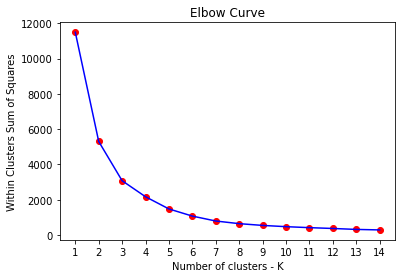

In [41]:
import matplotlib.pyplot as plt
plt.scatter(K,WCSS,c="red")
plt.plot(K,WCSS,c="blue")
plt.xlabel("Number of clusters - K")
plt.ylabel("Within Clusters Sum of Squares")
plt.title("Elbow Curve")
plt.xticks(range(1,15,1))

In [43]:
A.head(2)

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend


In [45]:
B.head(2)

,Price,MPG.city
0,15.9,25
1,33.9,18


In [52]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=4)
B = A[["Price","MPG.city","Horsepower","Length"]]
model = agc.fit(B)

In [53]:
model

AgglomerativeClustering(n_clusters=4)

In [54]:
A["Cluster"]= model.labels_


In [58]:
model.labels_


array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0,
       3, 3, 1, 1, 1, 2, 3, 0, 3, 1, 3, 1, 1, 1, 1, 0, 3, 3, 0, 3, 1, 3,
       1, 3, 1, 2, 0, 0, 0, 0, 3, 3, 0, 0, 2, 1, 0, 3, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 0, 0, 3, 3, 1, 0, 0, 0, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 3,
       1, 1, 0, 1, 0], dtype=int64)

In [55]:
A[A.Cluster == 2][["Model"]]


,Model
10,Seville
18,Corvette
27,Stealth
47,Q45
56,RX-7


# Creation of a Dendogram


In [56]:
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import matplotlib.pyplot as plt

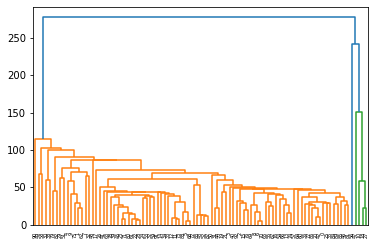

In [57]:
D = pd.DataFrame(distance_matrix(B.values,B.values))
dendrogram(linkage(D))
plt.show()